Các bước thực hiện:

```
# This is formatted as code
```

 1) chia bộ dữ liệu thành tập training
và test; 
2) tính PCA cho bộ training; 
3) với mỗi giá trị k,
xây dựng bộ phân lớp với bộ training của k đặc trưng
của PCA; 
4) xác định k đặc trưng của bộ test thông qua
ước lượng PCA ở bước 2; 
5) tính các độ đo hiệu quả
của bộ phân với với giá trị k này; 
6) lặp lại bước 3-5 với
các giá trị k đã lựa chọn.

 1) chia bộ dữ liệu thành tập training và test

In [240]:
import numpy as np
import pandas as pd


In [241]:

with open('breast-cancer-wisconsin.data') as f:
  lines = f.readlines()
lines[:10]


['1000025,5,1,1,1,2,1,3,1,1,2\n',
 '1002945,5,4,4,5,7,10,3,2,1,2\n',
 '1015425,3,1,1,1,2,2,3,1,1,2\n',
 '1016277,6,8,8,1,3,4,3,7,1,2\n',
 '1017023,4,1,1,3,2,1,3,1,1,2\n',
 '1017122,8,10,10,8,7,10,9,7,1,4\n',
 '1018099,1,1,1,1,2,10,3,1,1,2\n',
 '1018561,2,1,2,1,2,1,3,1,1,2\n',
 '1033078,2,1,1,1,2,1,1,1,5,2\n',
 '1033078,4,2,1,1,2,1,2,1,1,2\n']

In [242]:
test = lines[40]
test

'1096800,6,6,6,9,6,?,7,8,1,2\n'

In [243]:
def processing(string):
  string = string.replace('\n', '')
  strings = string.split(',')
  arr = np.zeros(len(strings), dtype='int32')
  for i in range(len(strings)):
    if strings[i] != '?':
      arr[i] = int(strings[i])
  return arr

  


In [244]:
processing(test)

array([1096800,       6,       6,       6,       9,       6,       0,
             7,       8,       1,       2], dtype=int32)

In [245]:
data = []
for i in range(len(lines)):
  line = processing(lines[i])
  data.append(line)
data[:10]

[array([1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1,       2], dtype=int32),
 array([1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2], dtype=int32),
 array([1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2], dtype=int32),
 array([1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2], dtype=int32),
 array([1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2], dtype=int32),
 array([1017122,       8,      10,      10,       8,       7,      10,
              9,       7,       1,       4], dtype=int32),
 array([1018099,       1,       1,       1,       1,       2,      10,
              3,       1,       1,       2], dtype=int32),
 array([1018561,       2,       1,       2,       1,       2,       1,
              3,   

In [246]:
data = np.copy(data)
data.shape

(699, 11)

In [247]:
data[40]

array([1096800,       6,       6,       6,       9,       6,       0,
             7,       8,       1,       2], dtype=int32)

In [248]:
data[:10]

array([[1000025,       5,       1,       1,       1,       2,       1,
              3,       1,       1,       2],
       [1002945,       5,       4,       4,       5,       7,      10,
              3,       2,       1,       2],
       [1015425,       3,       1,       1,       1,       2,       2,
              3,       1,       1,       2],
       [1016277,       6,       8,       8,       1,       3,       4,
              3,       7,       1,       2],
       [1017023,       4,       1,       1,       3,       2,       1,
              3,       1,       1,       2],
       [1017122,       8,      10,      10,       8,       7,      10,
              9,       7,       1,       4],
       [1018099,       1,       1,       1,       1,       2,      10,
              3,       1,       1,       2],
       [1018561,       2,       1,       2,       1,       2,       1,
              3,       1,       1,       2],
       [1033078,       2,       1,       1,       1,       2,       1,
 

In [249]:
data_ = data[:, 1:11]
data_

array([[ 5,  1,  1, ...,  1,  1,  2],
       [ 5,  4,  4, ...,  2,  1,  2],
       [ 3,  1,  1, ...,  1,  1,  2],
       ...,
       [ 5, 10, 10, ..., 10,  2,  4],
       [ 4,  8,  6, ...,  6,  1,  4],
       [ 4,  8,  8, ...,  4,  1,  4]], dtype=int32)

In [250]:
data_.shape

(699, 10)

In [251]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data_, test_size=0.2, random_state=10)


In [252]:
X_train.shape

(559, 10)

In [253]:
X_train_feature = X_train[:,:9]
X_train_label = X_train[:, 9]
X_test_feature = X_test[:,:9]
X_test_label = X_test[:, 9]

In [254]:
X_train_feature[:2]

array([[1, 1, 1, 1, 2, 1, 1, 1, 1],
       [1, 1, 1, 1, 2, 1, 1, 1, 1]], dtype=int32)

2) tính PCA cho bộ training; 

In [255]:
# PCA k =2
#mean
X_bar = X_train_feature - X_train_feature.mean(axis=0)
X_bar = X_bar.T

In [256]:
X_bar.shape

(9, 559)

In [257]:
conv_mat = np.cov(X_bar)
eigen_values, eigen_vectors = np.linalg.eig(conv_mat)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[sorted_index]

[-0.30051823,  0.14201149, -0.80340081, -0.01495198, -0.06776486,
         0.06136016, -0.1881806 ,  0.42297853, -0.14548261],

In [258]:
sorted_eigenvectors

array([[-0.29843103, -0.18910195, -0.82577886,  0.02422343, -0.03500633,
         0.42046445, -0.07936546, -0.06704379,  0.06222812],
       [-0.40813485,  0.20186132, -0.05616196,  0.72304886,  0.35980412,
        -0.29398984, -0.07835535,  0.07975396, -0.19579286],
       [-0.39223593,  0.1529378 , -0.13088705, -0.67294176,  0.27770076,
        -0.3383995 , -0.06574609,  0.15649191, -0.36377846],
       [-0.25139274,  0.17397511,  0.01383118, -0.08974657,  0.15421885,
        -0.11948376,  0.51269531, -0.69230319,  0.34364021],
       [-0.44081022, -0.7740217 ,  0.24256762,  0.04599532, -0.27030454,
        -0.155048  ,  0.18894312,  0.01522492, -0.11218916],
       [-0.29833246,  0.0329876 ,  0.08008931, -0.08607744, -0.03859645,
        -0.19183061, -0.4032495 ,  0.25006993,  0.79539433],
       [-0.12466463,  0.14500696,  0.04553158, -0.0021067 ,  0.1073372 ,
         0.27928945,  0.66959527,  0.6318191 ,  0.15581106],
       [-0.35336948,  0.49804798,  0.08055356,  0.03526511, -0

In [259]:
sorted_index

array([0, 1, 2, 4, 5, 6, 8, 7, 3])

In [260]:
Utk = sorted_eigenvectors[0:2, :]
Z = Utk @ X_bar
print(Z.shape)

(2, 559)


In [261]:
Z = Z.T

In [262]:
Z

array([[ 2.57384368,  0.24164407],
       [ 2.57384368,  0.24164407],
       [ 1.55181093, -1.20911496],
       ...,
       [ 1.51981968, -1.13947119],
       [ 2.49447823,  0.16328872],
       [-1.32299171, -1.63633796]])

In [263]:
colors= []
so_2 = 0
so_4 = 0
for i in range(len(X_train_label)):
  if X_train_label[i] == 2:
    colors.append(0)
    so_2 += 1
  else:
    colors.append(1)
    so_4 += 1
colors[:10]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]

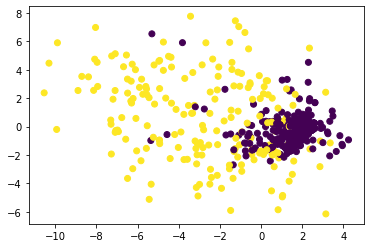

In [264]:
import matplotlib.pyplot as plt

fg = plt.subplot()
plt.scatter(Z[:,0], Z[:, 1], c=colors)
plt.show()

In [265]:
# Bayes classification
print('{}, {}'.format(so_2, so_4))
#class 1
# lọc ra data của 2 lớp
data_class_2 = []
data_class_4 = []

for i in range(len(X_train_feature)):
  if X_train_label[i] == 2:
    data_class_2.append(X_train_feature[i])
  else:
    data_class_4.append(X_train_feature[i])

data_class_2 = np.copy(data_class_2)
data_class_4 = np.copy(data_class_4)




360, 199


In [266]:
feature1 = data_class_2
n1 = len(feature1)
prior1 = n1 / len(X_train_feature)
u1 = feature1.mean(axis=0)
print(u1)
Z_1 = feature1 - u1
print(Z_1)

sigma_1 = (Z_1.T @ Z_1)/n1
print('Sigma', sigma_1)

[3.         1.31944444 1.45833333 1.38888889 2.14166667 1.24166667
 2.09722222 1.31111111 1.05      ]
[[-2.         -0.31944444 -0.45833333 ... -1.09722222 -0.31111111
  -0.05      ]
 [-2.         -0.31944444 -0.45833333 ... -1.09722222 -0.31111111
  -0.05      ]
 [ 0.         -0.31944444  1.54166667 ... -1.09722222 -0.31111111
  -0.05      ]
 ...
 [ 1.         -0.31944444 -0.45833333 ...  0.90277778 -0.31111111
  -0.05      ]
 [-2.         -0.31944444 -0.45833333 ... -0.09722222 -0.31111111
  -0.05      ]
 [ 2.         -0.31944444  2.54166667 ...  0.90277778  0.68888889
  -0.05      ]]
Sigma [[ 2.77777778e+00  3.91666667e-01  4.58333333e-01  4.11111111e-01
   2.55555556e-01  1.22222222e-01  2.16666667e-01  3.11111111e-01
  -3.88888889e-02]
 [ 3.91666667e-01  8.28510802e-01  6.36921296e-01  3.84104938e-01
   3.99189815e-01  3.31134259e-01  3.55054012e-01  5.78395062e-01
   6.25000000e-03]
 [ 4.58333333e-01  6.36921296e-01  9.87152778e-01  3.38425926e-01
   3.87847222e-01  2.69791667e-0

In [267]:
#class 2
feature2 = data_class_4
n2 = len(feature2)
prior2 = n2 / len(X_train_feature)
u2 = feature2.mean(axis=0)
Z_2 = feature2 - u2
sigma_2 = (Z_2.T @ Z_2)/n2
print(sigma_2)
#test

[[ 5.96550592  0.51544153  0.79210121 -0.89863892  0.21514608 -0.21292392
  -0.02618621 -0.15779905  0.60695437]
 [ 0.51544153  7.47279109  5.13002197  2.96063231  2.98712154 -0.28203833
   2.4796091   2.30693669  1.6414232 ]
 [ 0.79210121  5.13002197  6.59064165  2.06055403  2.37572284  0.11827984
   2.00234843  2.32751698  1.38395495]
 [-0.89863892  2.96063231  2.06055403  9.93333502  1.56294033  1.71884548
   2.19408601  2.16868261  2.04292821]
 [ 0.21514608  2.98712154  2.37572284  1.56294033  5.96424333  0.0742153
   1.38559632  1.88235146  2.15428903]
 [-0.21292392 -0.28203833  0.11827984  1.71884548  0.0742153   9.99767683
   0.94707204 -0.9639403   0.05732178]
 [-0.02618621  2.4796091   2.00234843  2.19408601  1.38559632  0.94707204
   5.08037676  1.96573319  0.4695841 ]
 [-0.15779905  2.30693669  2.32751698  2.16868261  1.88235146 -0.9639403
   1.96573319 11.06275094  1.86381657]
 [ 0.60695437  1.6414232   1.38395495  2.04292821  2.15428903  0.05732178
   0.4695841   1.8638165

In [268]:
# test
import math
def multivariateNormal(x, sigma, mu):
    tu = math.exp(((x - mu) @ np.linalg.inv(sigma) @ (x - mu).T)/(-2))
    mau = math.sqrt(2 * math.pi) ** x.shape[0] * math.sqrt(np.abs(np.linalg.det(sigma)))
    return tu/mau


In [270]:
X_test_label[: 10]

array([4, 2, 2, 2, 2, 4, 2, 2, 4, 2], dtype=int32)

In [271]:
x_test = X_test_feature[2]
_aaaa = multivariateNormal(x_test, sigma_1, u1)
_bbbb = multivariateNormal(x_test, sigma_2, u2)
if _aaaa > _bbbb:
  print(2)
elif _aaaa == _bbbb:
  print('Equal')
else:
  print(4)    

2


In [272]:
true_label = np.zeros(shape=(1, len(X_test_feature)), dtype=np.int32)
true_label.shape

(1, 140)

In [273]:
for i in range(len(X_test_feature)):
  _aa = multivariateNormal(X_test_feature[i], sigma_1, u1)
  _bb = multivariateNormal(X_test_feature[i], sigma_2, u2)
  if _aa > _bb:
    true_label[0, i] = 2
  # elif _aa == _bb:
  #   true_label[0, i] = 2
  else:
    true_label[0, i] = 4

In [274]:
print(X_test_label[: 30])
print(true_label[0, :30])

[4 2 2 2 2 4 2 2 4 2 4 2 2 2 2 2 2 2 2 4 4 4 4 2 2 4 4 4 2 2]
[4 2 2 2 2 4 2 2 4 2 4 2 2 2 2 4 2 2 4 4 2 4 4 2 2 4 4 4 2 2]


In [275]:
from sklearn.metrics import f1_score
f1_score(X_test_label, true_label[0], average='macro')

0.9345029239766082

In [276]:
import sklearn.metrics as mt
mt.accuracy_score(X_test_label, true_label[0])


0.9428571428571428

In [277]:
from sklearn.metrics import classification_report
print(classification_report(X_test_label, true_label[0]))

              precision    recall  f1-score   support

           2       0.99      0.93      0.96        98
           4       0.85      0.98      0.91        42

    accuracy                           0.94       140
   macro avg       0.92      0.95      0.93       140
weighted avg       0.95      0.94      0.94       140

